In [7]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)


datos=pd.read_csv("weight-height.csv")
df=pd.DataFrame(datos)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


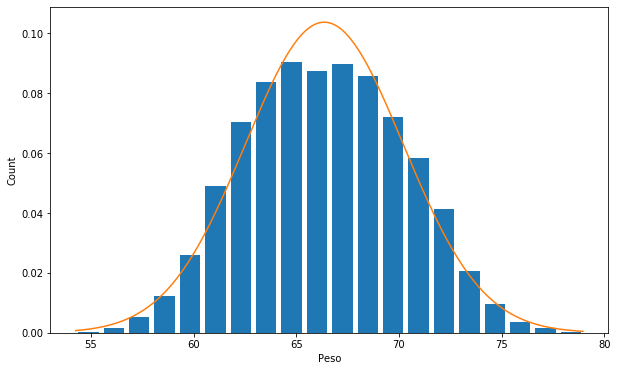

In [13]:
#VAMOS A GRAFICAR UN HISTOGRAMA PARA PODER OBSERVAR QUE DISTRIBUCION TENE
from scipy.stats import norm   #para graficar la linea
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density=True )
#BINS ES CUANTAS BARRAS QUIERES VER EN EL HISTOGRAMA
plt.xlabel("Peso")
plt.ylabel("Count")
#en este caso quitamos el show

rng = np.arange(df.Height.min(), df.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(),df.Height.std()))


In [17]:
#PODEMOS CALCULAR LA DESVIACION ESTANDAR LA CUAL ES LA DISTANCIA QUE TIENE LOS PUNTOS CON RESPECTO A LA MEDIA 
print(df.Height.std())
print(df.Height.mean())

3.847528120773233
66.36755975482106


In [20]:
#VAMOS ANALIZARLO POR MEDIO DE LA DESVIACION ESTARNDAR IGUAL A 3 LO CUAL SERIA EL 95% RECORDAR ESTA INFORMACION
#https://www.mathsisfun.com/data/standard-normal-distribution.html
#https://www.youtube.com/watch?v=OiKEs2BZ4v0

Limite_superior = df.Height.mean() + 3*df.Height.std()
Limite_superior

77.91014411714076

In [21]:
Limite_inferior = df.Height.mean() -3*df.Height.std()
Limite_inferior

54.82497539250136

In [22]:
#OBSERVAREMOS LOS DATOS QUE QUEDARIAN FUERA
df[(df.Height<Limite_inferior) | (df.Height>Limite_superior)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [23]:
#ahora escogemos los que queremos
df2 = df[(df.Height>Limite_inferior) & (df.Height<Limite_superior)]
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [28]:
#LO MISMO SE PUEDE HACER CON LA Z-SCORE 
#Z score indicates how many standard deviation away a data point is.
#For example in our case mean is 66.37 and standard deviation is 3.84.
#If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)
#a cuantas desviaciones estandar esta el valor 77.91


#formula z = (X-media)/std

#crearemos una columna que muestre sus valores z
df["Zscore"]= ((df.Height-df.Height.mean())/df.Height.std())
df.head()




,Gender,Height,Weight,Z-score,Zscore
0,Male,73.847017,241.893563,1.943964,1.943964
1,Male,68.781904,162.310473,0.627505,0.627505
2,Male,74.110105,212.740856,2.012343,2.012343
3,Male,71.730978,220.042470,1.393991,1.393991
4,Male,69.881796,206.349801,0.913375,0.913375


In [29]:
#DE ESTA FORMA SE PUEDE REALIZAR LOS PASOS ANTERIORES, RECORDAR QUE EN EL CENTRO SERIA 0 
df2Z = df[(df.Zscore>-3) & (df.Zscore<3)]
df2Z

,Gender,Height,Weight,Z-score,Zscore
0,Male,73.847017,241.893563,1.943964,1.943964
1,Male,68.781904,162.310473,0.627505,0.627505
2,Male,74.110105,212.740856,2.012343,2.012343
3,Male,71.730978,220.042470,1.393991,1.393991
4,Male,69.881796,206.349801,0.913375,0.913375
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.050658
9996,Female,67.067155,170.867906,0.181830,0.181830
9997,Female,63.867992,128.475319,-0.649655,-0.649655
9998,Female,69.034243,163.852461,0.693090,0.693090
